# Chapter 4 練習と総合問題解答

In [1]:
# 以下のライブラリを使うので、あらかじめ読み込んでおいてください
import numpy as np
import numpy.random as random
import scipy as sp
import pandas as pd
from pandas import Series, DataFrame

# 可視化ライブラリ
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

# 小数第３位まで表示
%precision 3

'%.3f'

#### <練習問題 4-1>

コインの表を0、裏を1として表現する配列を次のように用意します。

`coin_data = np.array([0,1])`

この配列を使って、コイン投げの試行を1,000回実行し、その結果、表（値が0）ならびに裏（値が1）が出るそれぞれの確率を求めてください。

In [2]:
# 解答
# コインと見なしたデータ
# 注意：配列は順番が考慮されているので、厳密には集合ではないが、集合とみなす
# 0:head , 1:tail
coin_data = np.array([0,1])

# コインを1000回投げます
N = 1000

# seedの固定
random.seed(0)

# choiceを使う
count_all_coin = random.choice(coin_data, N)

In [3]:
# それぞれの数字がどれくらいの割合で抽出されたか計算
for i in [0,1]:
    print(i,'が出る確率',len(count_all_coin[count_all_coin==i]) / N)

0 が出る確率 0.496
1 が出る確率 0.504


#### <練習問題 4-2>

くじ引きの問題を考えます。1,000本のくじの中に、100本のあたりがあるとします。$A$くんと$B$くんが順にくじを引き、$A$くんと$B$くんともにあたりを引く確率を求めてください。ただし、引いたくじは戻さないとして、それぞれ1回のみ引きます（これは手計算でも大丈夫です）。

(解答)  
X:Aくんがあたりを引く事象  
Y:Bくんがあたりを引く事象  
とします。  

すると、以下のように計算できます。

\begin{eqnarray}
P(X \cap Y) = P(Y|X)P(X) =\frac{99}{999}*\frac{100}{1000} = \frac{1}{1110}
\end{eqnarray}

#### <練習問題 4-3>
日本国内である病気（$X$）になっている人の割合は、0.1%だとします。$X$を発見する検査方法で、次のことがわかっています。

・その病気の人がその検査を受けると99%の人が陽性反応（病気である）を示します。

・その病気でない人がその検査を受けると3%の人が陽性反応を示します（誤診）。

日本に住んでいるある人がこの検査を受けたら陽性反応を示しました。この人が病気$X$である確率は何%でしょうか？

(解答)  
各事象を次のように表します。  
A:病気（$X$）である  
B:陽性反応を示す    
とします。すると以下のことがわかります。

$P(B|A)$ ：病気$X$の人が陽性反応を示す  
$P(A)$ ：病気$X$の人の割合  
$P(B|A^c)$ ：病気$X$でない人が陽性を示す  
$P(A^c)$ ：病気$X$でない人の割合  

そして、ベイズの定理を利用すると、求めたい確率は以下のように計算できます。

\begin{eqnarray}
 P(A|B) =\frac{P(B|A)*P(A)}{P(B)} = \frac{P(B|A)*P(A)}{P(B|A)P(A) + P(B|A^c)P(A^c)}=0.032
\end{eqnarray}

In [4]:
# 実際の計算例
0.99*0.001/(0.99*0.001+0.03*0.99)

0.032

#### <練習問題 4-4>

平均0、分散1の正規母集団から`n=100`の標本抽出を1,000回繰り返して、標本平均$\overline{X}=\frac{1}{n}\sum^n_{i=1}X_i$の標本分布（ヒストグラム）を描いてください。



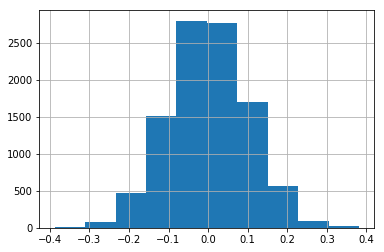

In [5]:
# 解答
N = 10000
# normal version
normal_sample_data = [np.random.normal(0, 1, 100).mean() for _ in range(N)]

plt.hist(normal_sample_data)
plt.grid(True)

#### <練習問題4-5>

<練習問題 4-4>と同じく、対数正規分布を描いてください。

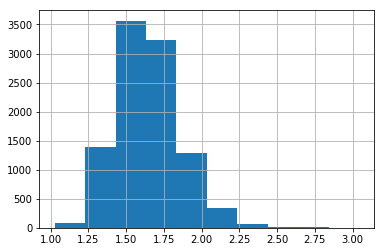

In [6]:
# 解答
N = 10000
# normal version
normal_sample_data = [np.random.lognormal(0, 1, 100).mean() for _ in range(N)]

plt.hist(normal_sample_data)
plt.grid(True)

#### <練習問題 4-6>

3章で使用した、学生の数学の成績データ（student_data_math）の一期目の成績G1のヒストグラムとカーネル密度関数を描いてください。

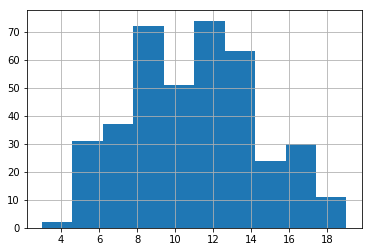

In [7]:
# 解答
student_data_math = pd.read_csv('student-mat.csv', sep=';')
plt.hist(student_data_math.G1)
plt.grid(True)

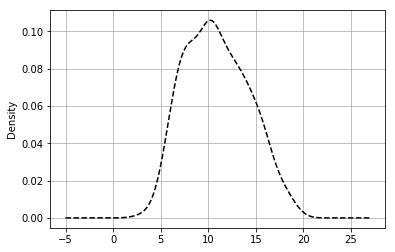

In [8]:
# 解答
student_data_math.G1.plot(kind='kde',style='k--')
plt.grid(True)

#### <練習問題 4-7>

自由度5、25、50のカイ二乗分布に従う乱数をそれぞれ1,000個発生させて、ヒストグラムを書いてください。

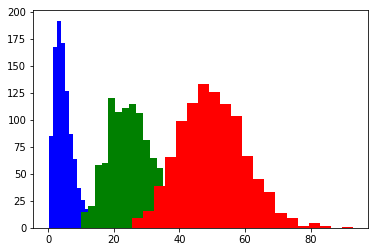

In [9]:
for df, c in zip([5,25,50], 'bgr'):
    x = random.chisquare(df, 1000)
    plt.hist(x, 20, color=c)

#### <練習問題 4-8>

自由度100のt分布に従う乱数を1,000個発生させて、ヒストグラムを書いてください。

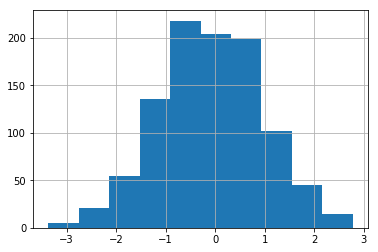

In [10]:
# t-分布
x = random.standard_t(100, 1000)
plt.hist(x)
plt.grid(True)

#### <練習問題 4-9>

自由度`(10,30)`、`(20,25)`のF分布に従う乱数をそれぞれ1,000個発生させて、ヒストグラムを書いてください。

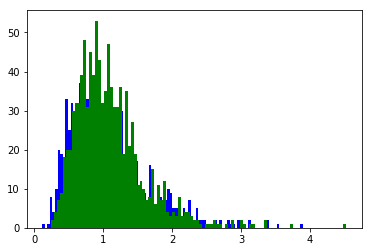

In [11]:
# F 分布
for df, c in zip([(10,30), (20,25)], 'bg'):
    x = random.f(df[0], df[1], 1000)
    plt.hist(x, 100, color=c)

#### <練習問題 4-10>
平均$\mu$で分散$\sigma^2$の正規母集団から大きさ$n$の標本から作った標本平均は、母平均であることが望ましく、この不偏性を示してください。手計算で大丈夫です。

(解答)  
標本平均
\begin{eqnarray}
\overline{X}=\frac{1}{n}\sum^n_{i=1}X_i
\end{eqnarray}
について、
\begin{eqnarray}
E[\overline{X}]=\mu
\end{eqnarray}
を示せば、不偏性があると言えます。

ここで、
\begin{eqnarray}
E[\overline{X}]=E[\frac{1}{n}\sum^n_{i=1}X_i]=\frac{1}{n}E[\sum^n_{i=1}X_i]
\end{eqnarray}

が成り立ち、問題文より
$E[\overline{X_i}]=\mu$が使えるので、
\begin{eqnarray}
E[\overline{X}]=\mu
\end{eqnarray}
となるので、不偏性があると言えました。

#### <練習問題 4-11>
あるコインを5回投げたとき、裏、表、裏、表、表と出ました。このコインの表が出る確率を$\theta$として、これを推定してください。手計算で大丈夫です。

(解答)  
コインの表が出る確率を$\theta$とすると、裏が出る確率は$1-\theta$となります。尤度関数は、

\begin{eqnarray}
L(\theta)=\theta^3(1-\theta)^2
\end{eqnarray}

となり、この関数を微分して、最大値を求めると$\theta$が0.6の時に最大になりますので、これが最尤推定値となります。なお、以下のような図を書くと、おおよその値がわかります。

In [12]:
# 尤度関数
def coin_likeh_fuc(x):
    return (x**3) * ((1-x)**2)

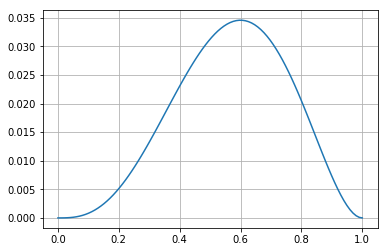

In [13]:
x = np.linspace(0, 1, 100)
plt.plot(x,coin_likeh_fuc(x))
plt.grid(True)

#### <練習問題 4-12>
母集団が以下の指数分布に従っている時に、そこから大きさnの標本${X_1,X_2,...X_n}$を得たとして、母数${\lambda}$を最尤推定してください。手計算で大丈夫です。


\begin{eqnarray}
f(x|\lambda) = \lambda \mathrm{e}^{-\lambda x}
\end{eqnarray}

(解答)  
与えられた式において、両辺の対数を取って、対数尤度を考えると、
\begin{eqnarray}
n\log(\lambda)-(\lambda)\sum^n_{i=1}x_i
\end{eqnarray}
となりますので、これを$\lambda$について微分して、解くと、

\begin{eqnarray}
\frac{n}{\sum^n_{i=1}x_i}
\end{eqnarray}

が得られ、これが最尤推定量になります。

#### <練習問題 4-13>

3章で使用したデータで、数学とポルトガル語の成績のG2のそれぞれの平均について、差があると言えるでしょうか。また、G3はどうでしょうか。

In [14]:
student_data_math = pd.read_csv('student-mat.csv',sep=';')
student_data_por = pd.read_csv('student-por.csv',sep=';')
student_data_merge = pd.merge(student_data_math
                              ,student_data_por
                              ,on=['school','sex','age','address','famsize','Pstatus','Medu'
                                      ,'Fedu','Mjob','Fjob','reason','nursery','internet']
                              ,how='inner'
                              ,suffixes=('_math', '_por'))

In [15]:
# 解答
from scipy import stats

print('G2数学の成績平均：',student_data_merge.G2_math.mean())
print('G2ポルトガル語の成績平均：',student_data_merge.G2_por.mean())

t, p = stats.ttest_rel(student_data_merge.G2_math, student_data_merge.G2_por)
print( 'p値 =',p )

G2数学の成績平均： 10.712041884816754
G2ポルトガル語の成績平均： 12.238219895287958
p値 = 4.0622824801348043e-19


In [16]:
print('G3数学の成績平均：',student_data_merge.G3_math.mean())
print('G3ポルトガル語の成績平均：',student_data_merge.G3_por.mean())

t, p = stats.ttest_rel(student_data_merge.G3_math, student_data_merge.G3_por)
print( 'p値 = ',p )

G3数学の成績平均： 10.387434554973822
G3ポルトガル語の成績平均： 12.515706806282722
p値 =  5.561492113688385e-21


どちらも有意差1%未満であるため、「差がある」と結論づけることができました。

## 4.8 総合問題

### ■総合問題4-1 検定

「4.7 統計的検定」で使用したデータ（`student_data_merge`）を使って、以下の問いに答えてください。

（1）それぞれの欠席数（`absences`）については、差があるといえるでしょうか。


In [17]:
# 解答 (1)
print('数学の欠席数平均：',student_data_merge.absences_math.mean())
print('ポルトガル語の欠席平均：',student_data_merge.absences_por.mean())

t, p = stats.ttest_rel(student_data_merge.absences_math, student_data_merge.absences_por)
print( 'p値 = ',p )

数学の欠席数平均： 5.319371727748691
ポルトガル語の欠席平均： 3.6727748691099475
p値 =  2.3441656888384195e-06


有意差1%未満で「差がある」と結論づけることができました。

（2）それぞれの勉強時間（`studytime`）についてはどうでしょうか。

In [18]:
# 解答(2)
print('数学の勉強時間平均：',student_data_merge.studytime_math.mean())
print('ポルトガル語の勉強時間平均：',student_data_merge.studytime_por.mean())

t, p = stats.ttest_rel(student_data_merge.studytime_math, student_data_merge.studytime_por)
print( 'p値 = ',p)

数学の勉強時間平均： 2.0340314136125652
ポルトガル語の勉強時間平均： 2.0392670157068062
p値 =  0.5643842756976525


有意差5%でも「差がある」とは言えないようです。